In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
nifty = pd.read_csv('D:\\nifty.csv',
                     usecols=['Date', "Close"],
                     parse_dates=['Date'])

nifty.set_index("Date", inplace=True) #setting "Date" as index
nifty_v1 = nifty.asfreq("b", method='ffill').copy() #setting frequency to business days

<Axes: xlabel='Date'>

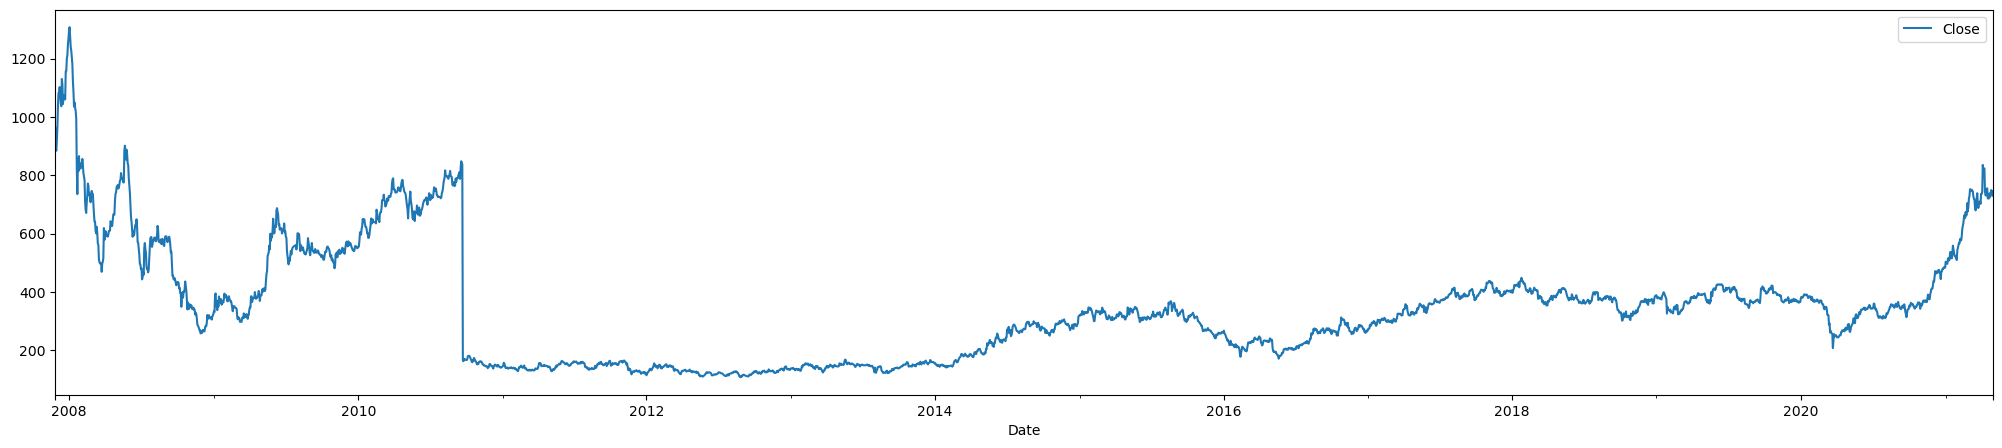

In [28]:
nifty_v1.plot(figsize=(25,5))

In [30]:
nifty = nifty_v1

In [29]:
def my_auto_corr(df, nlags=2):
    '''
    Returns autocorrelation coefficient for lags [nlags, 0]
    
    df: dataframe
        Input dataframe of time series
    nlags: int
           maximum number of lags, default 2
    
    Returns
    array: autocorrelation coefficients for lags [nlags, 0]
    '''
    def autocorr(y, lag=2):
        '''
        Calculates autocorrelation coefficient for single lag value
        
        y: array
           Input time series array
        lag: int, default: 2 
             'kth' lag value
        
        Returns
        int: autocorrelation coefficient 
        '''
        y = np.array(y).copy()
        y_bar = np.mean(y) #y_bar = mean of the time series y
        denominator = sum((y - y_bar) ** 2) #sum of squared differences between y(t) and y_bar
        numerator_p1 = y[lag:] - y_bar #y(t)-y_bar: difference between time series (from 'lag' till the end) and y_bar
        numerator_p2 = y[:-lag] - y_bar #y(t-k)-y_bar: difference between time series (from the start till lag) and y_bar
        numerator = sum(numerator_p1 * numerator_p2) #sum of y(t)-y_bar and y(t-k)-y_bar
        return (numerator / denominator)
    
    acf = [1] #initializing list with autocorrelation coefficient for lag k=0 which is always 1
    for i in range(1, (nlags + 1)):
        acf.append(autocorr(df.iloc[:, 0].values, lag=i)) #calling autocorr function for each lag 'i'
    return np.array(acf)

In [31]:
from statsmodels.graphics import tsaplots

print(f'my_auto_corr:\n{my_auto_corr(df=nifty, nlags=10)}\n\nstatsmodels acf:\n{tsaplots.acf(nifty.iloc[:,0].values,nlags=10)}')

my_auto_corr:
[1.         0.99441697 0.98887259 0.9832766  0.9774236  0.97172373
 0.96558168 0.95912641 0.95266118 0.94611799 0.9398013 ]

statsmodels acf:
[1.         0.99441697 0.98887259 0.9832766  0.9774236  0.97172373
 0.96558168 0.95912641 0.95266118 0.94611799 0.9398013 ]
